# **HANDWRITTEN DIGIT CLASSIFICATION**

**Step 1 - Import Liberaries**

In [18]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

**Step 2 - Train Test data import from Keras**

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f"No. of rows in trainging data : {len(X_train)}")
print(f"No. of rows in testing data : {X_test.shape[0]}")
print(f"shape of matrix : {X_test[0].shape}")

No. of rows in trainging data : 60000
No. of rows in testing data : 10000
shape of matrix : (28, 28)


**Step 3 - Visualise the data using matshow**

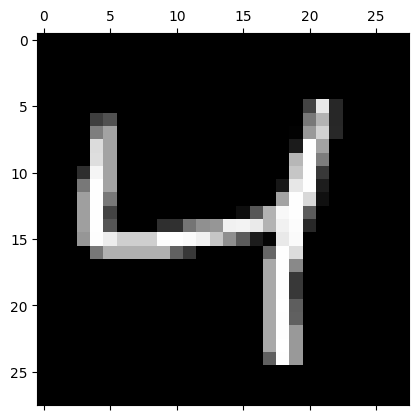

In [20]:
plt.matshow(X_train[2] , cmap='gray')

**Step  4- Flatten and Normalize the Training data**

In [21]:
X_train_flatten = X_train.reshape(len(X_train),28*28)/255.0
X_test_flatten = X_test.reshape(len(X_test),28*28)/255.0

print(f"after flatten both train and test data shape is : {X_train_flatten.shape} and {X_test_flatten.shape}")

after flatten both train and test data shape is : (60000, 784) and (10000, 784)


**Step  4- Building deep learning Model**

In [22]:
model = keras.Sequential([
    layers.Dense(10,input_shape=(28*28,),activation="sigmoid"), # 10 represent output classes Dense stand for connections btw input and outputlayer
]
)

# optimizers and loss are used to make model better
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flatten, y_train, epochs=5) # epochs is no. of times model will go through training data

c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8078 - loss: 0.7285
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9143 - loss: 0.3095
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9185 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9238 - loss: 0.2737
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9242 - loss: 0.2699


**Step  5- Evaluating the Data on test data**

In [23]:
model.evaluate(X_test_flatten, y_test) # evaluate the model on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9157 - loss: 0.3003


[0.2656329870223999, 0.926800012588501]

# Imrove the model using further analysis and adding more layers

In [25]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=model.predict(X_test_flatten).argmax(axis=1))
print(confusion_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
tf.Tensor(
[[ 961    0    1    2    0    5    6    3    2    0]
 [   0 1113    3    2    0    1    4    2   10    0]
 [   4    9  925   14    8    6   12   11   40    3]
 [   4    0   20  912    1   30    2   10   24    7]
 [   1    1    5    1  919    0   10    4   10   31]
 [   7    3    4   19    9  799   12    4   29    6]
 [  11    3    9    1    7   15  907    2    3    0]
 [   2    5   20    7    7    0    0  954    5   28]
 [   5    8    5   20    9   35    8   10  869    5]
 [  10    7    1   10   32    8    0   24    8  909]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'True Label')

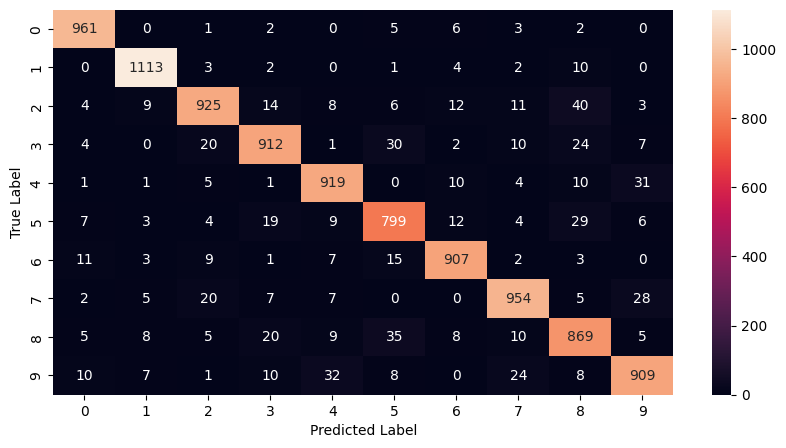

In [34]:
import seaborn as sns 
plt.figure(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


**Again Traing model with extra hidden Layer** 

In [35]:
model = keras.Sequential([
    layers.Dense(100,input_shape=(28*28,),activation="relu"), # 10 represent output classes Dense stand for connections btw input and outputlayer
    layers.Dense(10,activation="sigmoid") # 10 represent output classes Dense stand for connections btw input and outputlayer
]
)

# optimizers and loss are used to make model better
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train_flatten, y_train, epochs=5) # epochs is no. of times model will go through training data

c:\Users\13zer\anaconda3\envs\dl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8751 - loss: 0.4451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9627 - loss: 0.1303
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9751 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9822 - loss: 0.0612
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9849 - loss: 0.0496


In [36]:
model.evaluate(X_test_flatten, y_test) # evaluate the model on test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9693 - loss: 0.1002


[0.08924480527639389, 0.9718000292778015]

**Accuracy Increased by 4 % from 92 to 97** 